In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import *
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

## Open set

In [2]:
result_root_path = '/nas/home/cborrelli/bot_speech/results/open_set'


In [3]:
unknown_label = 7
unknown_number = 2

In [4]:
nfft_list = [512, 256, 128]
hop_size_list = [256, 128, 64]
selected_features = ['lpc', 'bicoh', 'unet']
selected_features = ['bicoh']
number_lpc_order = 49
stop_lpc_order = 50
normalizers_keys = ["minmax", "zscore", "l2"]
classifiers_keys = ["svm", "rf"]
include_bonafide_knownunknown = False
if include_bonafide_knownunknown:
    multiclass_list = ['-', 'A01', 'A02', 'A03', 'A04', 'A05', 'A06']
else:
    multiclass_list = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06']


# FARE ATTENZIONE: LA UNKNOWN LABEL é UGUALE AD UNA DI QUESTE ETICHETTE MA PACE
unknown_dict = {'A07': 7, 'A08': 8, 'A09': 9, 'A10': 10, 'A11': 11, 'A12': 12, 'A13': 13, 'A14': 14,
                       'A15': 15, 'A16': 16, 'A17': 17, 'A18': 18, 'A19': 19}

In [5]:
results_df = pd.DataFrame(columns=['nfft', 'hop_size', 'selected_features', 'number_lpc_order', 'stop_lpc_order', 
                                   'normalization', 'classifier',
                                   'known-unknown',
                                   'accuracy_train', 'accuracy_dev','accuracy_eval',
                                   'cm_train','cm_dev','cm_eval',
                                   'model_params' ])

for fft_params in zip(nfft_list, hop_size_list):
    nfft = fft_params[0]
    hop_size = fft_params[1]
    for c in classifiers_keys:
        for n in normalizers_keys:
            unknown_combinations = itertools.combinations(multiclass_list, unknown_number)
            for u in unknown_combinations:
                result_name = "class_{}_norm_{}_unknown_{}-{}_nfft_{}_hop-size_{}_numberlpcorder_{}_stoplpcorder_{}".format(
                    c, n, u[0], u[1], nfft, hop_size,
                    number_lpc_order,
                    stop_lpc_order)

                result_name = result_name + "_selected_features_" + "-".join(
                    s for s in selected_features) + ".npy"
                result_filename = os.path.join(result_root_path, result_name)

                if os.path.exists(result_filename):
                    result_dict = pickle.load(open(result_filename, "rb" ))
                    cm_train = confusion_matrix(result_dict['y_train'], result_dict['y_predict_train'],
                                               normalize='true')
                    cm_dev = confusion_matrix(result_dict['y_dev'], result_dict['y_predict_dev'],
                                             normalize='true')
                    cm_eval = confusion_matrix(result_dict['y_eval'], result_dict['y_predict_eval'],
                                              normalize='true')

                    acc_train = balanced_accuracy_score(result_dict['y_train'], result_dict['y_predict_train'])
                    acc_dev = balanced_accuracy_score(result_dict['y_dev'], result_dict['y_predict_dev'])
                    acc_eval = balanced_accuracy_score(result_dict['y_eval'], result_dict['y_predict_eval'])


                    results_df.loc[len(results_df.index)] = [nfft, hop_size, selected_features, 
                                                           number_lpc_order, stop_lpc_order,
                                                           n, c, u,
                                                           acc_train, acc_dev, acc_eval,
                                                           cm_train, cm_dev, cm_eval, result_dict['best_model'], ]
                        


/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


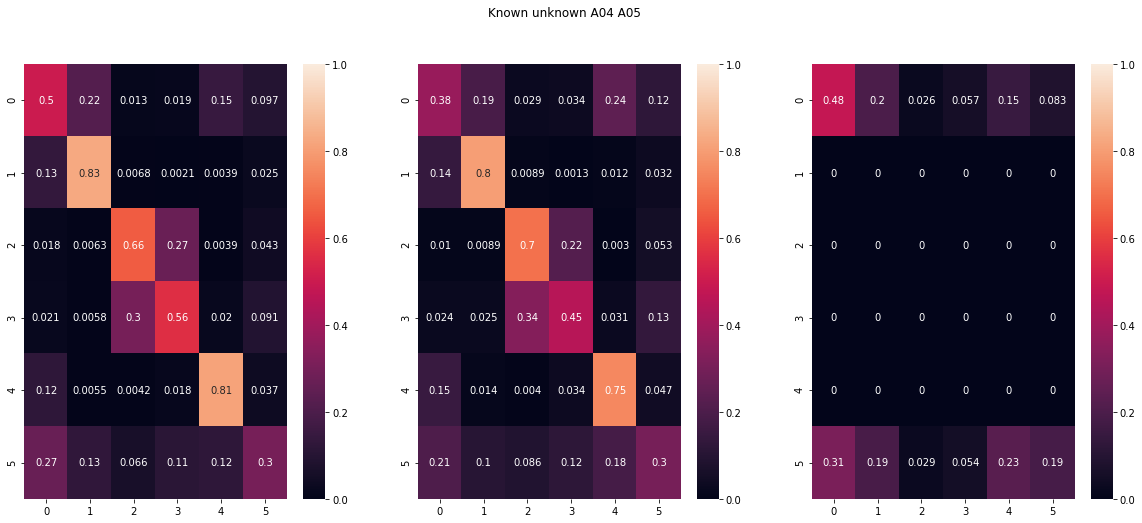

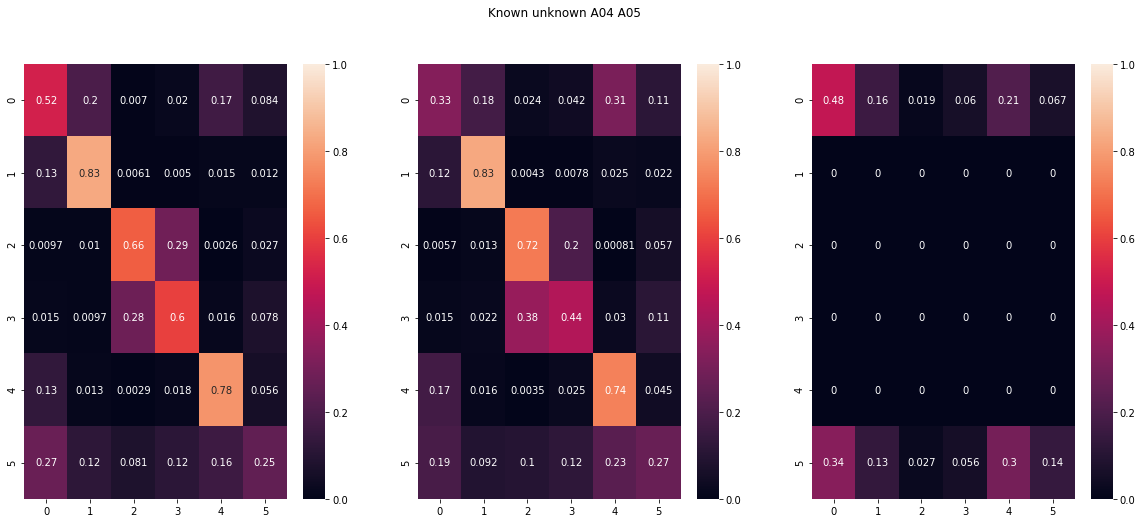

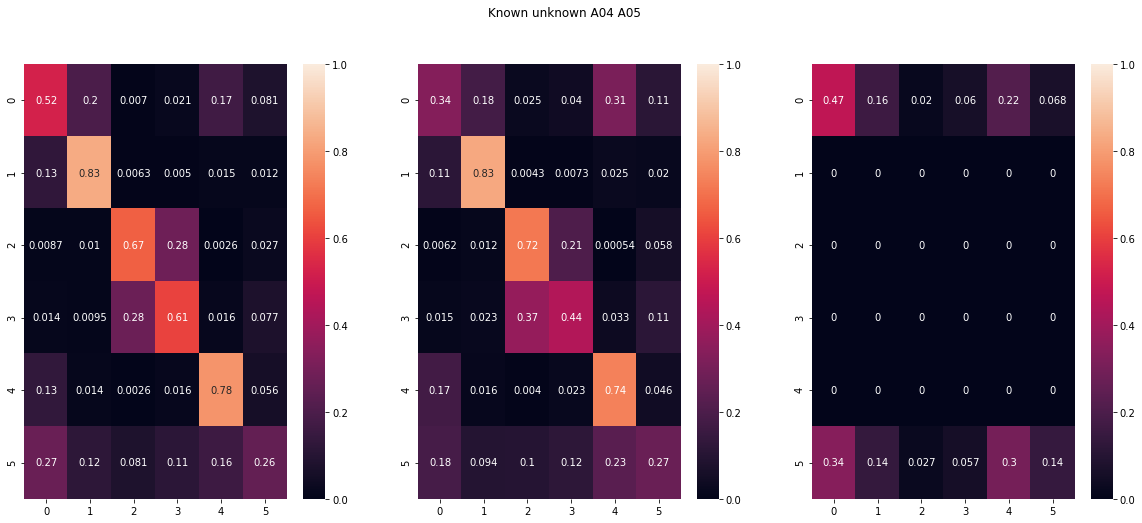

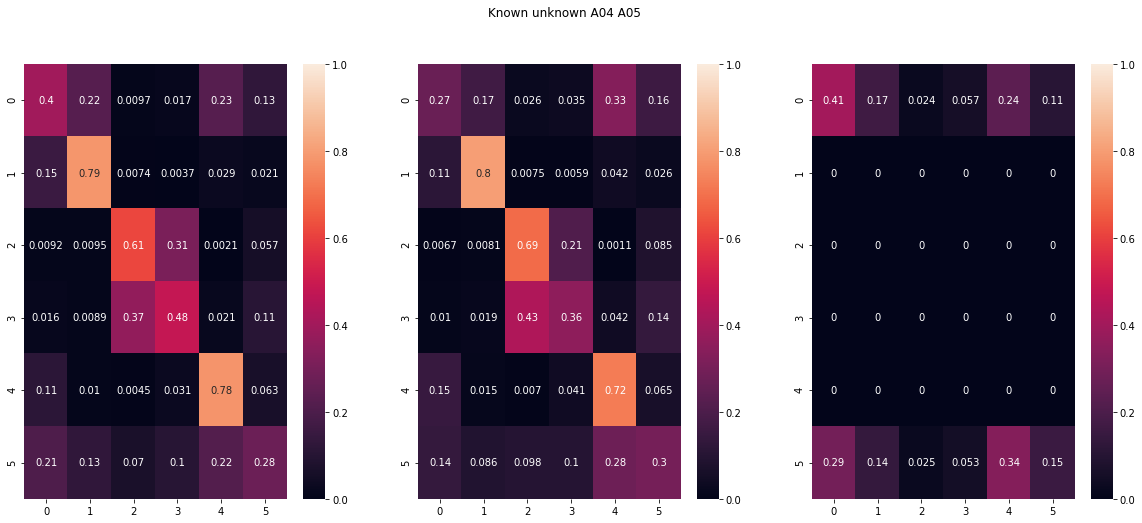

In [6]:
results_df.sort_values('accuracy_eval', ascending=False, inplace=True)
results_df.reset_index(inplace=True, drop=True)
for index, row in results_df.iterrows():
    #if index > 10:
    #    break
    
    
    #if row['classifier'] == 'svm' and row['nfft'] == 128 and row['normalization'] == 'zscore':
    if row['known-unknown'] == ('A04', 'A05'):
       
        plt.figure(figsize = (20,8))
        plt.suptitle("Known unknown {} {}".format(row['known-unknown'][0], row['known-unknown'][1]))

        plt.subplot(131)
        sns.heatmap(row['cm_train'], annot=True, vmin=0, vmax=1)

        plt.subplot(132)
        sns.heatmap(row['cm_dev'], annot=True, vmin=0, vmax=1)

        plt.subplot(133)
        sns.heatmap(row['cm_eval'], annot=True, vmin=0, vmax=1)

        plt.show()

In [7]:
results_df.sort_values('accuracy_eval', ascending=False, inplace=True)

for index, row in results_df.iterrows():
    if row['classifier'] == 'svm' and row['nfft'] == 256 and row['normalization'] == 'zscore':
        
        print("Known unknown {} {}".format(row['known-unknown'][0], row['known-unknown'][1]))
        print("Best model {}".format(row['model_params']))
        #print("Acc train {} Acc dev {} Acc eval {}".format(row['accuracy_train'],
        #                                                   row['accuracy_dev'],
        #                                                   row['accuracy_eval']))

Known unknown A01 A04
Best model {'class__C': 100, 'class__gamma': 0.01, 'class__kernel': 'rbf'}
Known unknown A01 A06
Best model {'class__C': 100, 'class__gamma': 0.1, 'class__kernel': 'rbf'}
Known unknown A01 A05
Best model {'class__C': 100, 'class__gamma': 0.01, 'class__kernel': 'rbf'}
Known unknown A02 A06
Best model {'class__C': 1000, 'class__gamma': 0.01, 'class__kernel': 'rbf'}
Known unknown A03 A05
Best model {'class__C': 100, 'class__gamma': 0.01, 'class__kernel': 'rbf'}
Known unknown A01 A02
Best model {'class__C': 100, 'class__gamma': 0.01, 'class__kernel': 'rbf'}
Known unknown A01 A03
Best model {'class__C': 100, 'class__gamma': 0.01, 'class__kernel': 'rbf'}
Known unknown A03 A04
Best model {'class__C': 100, 'class__gamma': 0.01, 'class__kernel': 'rbf'}
Known unknown A02 A05
Best model {'class__C': 100, 'class__gamma': 0.01, 'class__kernel': 'rbf'}
Known unknown A02 A04
Best model {'class__C': 100, 'class__gamma': 0.01, 'class__kernel': 'rbf'}
Known unknown A02 A03
Best mod

In [8]:
results_df.sort_values('accuracy_eval', ascending=False, inplace=True)
results_df.reset_index(inplace=True, drop=True)

unknown_combinations = itertools.combinations(multiclass_list, unknown_number)
knownunknown_dict = {}
for u in unknown_combinations:
    key = u[0] + '-' + u[1]
    knownunknown_dict[key] = []
    
for index, row in results_df.iterrows():
    key = row['known-unknown'][0] + '-' + row['known-unknown'][1]
    knownunknown_dict[key].append(row['accuracy_eval'])

## Eval on each unknown class

In [ ]:
unknown_results_df = pd.DataFrame(columns=['nfft', 'hop_size', 'selected_features', 
                                           'number_lpc_order', 'stop_lpc_order', 
                                           'normalization', 'classifier',
                                           'known-unknown',
                                           'accuracy_eval',
                                           'cm_eval',
                                           'model_params', 'orig_unknown' ])


In [ ]:
for fft_params in zip(nfft_list, hop_size_list):
    nfft = fft_params[0]
    hop_size = fft_params[1]
    for c in classifiers_keys:
        for n in normalizers_keys:
            unknown_combinations = itertools.combinations(multiclass_list, unknown_number)
            for u in unknown_combinations:
                result_name = "class_{}_norm_{}_unknown_{}-{}_nfft_{}_hop-size_{}_numberlpcorder_{}_stoplpcorder_{}".format(
                    c, n, u[0], u[1], nfft, hop_size,
                    number_lpc_order,
                    stop_lpc_order)
                result_name = result_name + "_selected_features_" + "-".join(
                    s for s in selected_features) + ".npy"
                
                result_filename = os.path.join(result_root_path, result_name)
                
                if os.path.exists(result_filename):
                    
                    result_dict = pickle.load(open(result_filename, "rb" ))
                    
                    for key_orig in unknown_dict:
                        y_predict_eval = result_dict['y_predict_eval']
                        y_eval = result_dict['y_eval']
                        y_eval_orig = result_dict['y_eval_orig']

                        selected_indexes = [a or b for a, b in zip(y_eval_orig == unknown_dict[key_orig], y_eval_orig == 0)]
                        
                        y_predict_eval = y_predict_eval[selected_indexes]
                        y_eval = y_eval[selected_indexes]
                        
                        cm_eval = confusion_matrix(y_eval, y_predict_eval, normalize='true')
                        acc_eval = balanced_accuracy_score(y_eval, y_predict_eval)
                        


                        unknown_results_df.loc[len(unknown_results_df.index)] = [nfft, hop_size, selected_features, 
                                                               number_lpc_order, stop_lpc_order,
                                                               n, c, u, acc_eval, cm_eval, result_dict['best_model'], key_orig]


In [ ]:
unknown_results_df.sort_values('accuracy_eval', ascending=False, inplace=True)
unknown_results_df.reset_index(inplace=True, drop=True)
for index, row in unknown_results_df.iterrows():
    for unknown_key in unknown_dict:
        if row['classifier'] == 'svm' and row['normalization'] == 'zscore' and row['orig_unknown']==unknown_key: #and row['known-unknown']==('A04','A05'):
            plt.figure(figsize = (10,10))
            plt.title("Unknown {} Known-unknown algorithm {}".format(row['orig_unknown'], row['known-unknown']))


            sns.heatmap(row['cm_eval'], annot=True, vmin=0, vmax=1)

            plt.show()

In [ ]:
unknown_results_df

In [ ]:
y_predict_eval = result_dict['y_predict_eval']


In [ ]:
y_predict_eval.min()